In [1]:
import pandas as pd
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

Using TensorFlow backend.


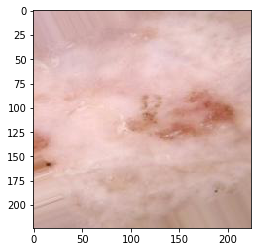

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


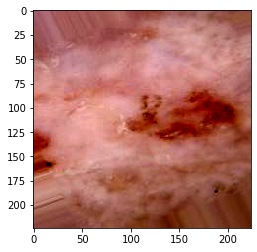

In [29]:
img = Image.open('test_image.jpg')
plt.imshow(img)
plt.show()

img = np.array(img)
img = keras.applications.mobilenet.preprocess_input(img)
plt.imshow(img)

In [30]:
mobilenet = keras.applications.mobilenet.MobileNet()
x = mobilenet.layers[-6].output
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=mobilenet.input, outputs=predictions)

In [31]:
filepath = "model.h5"
model.load_weights(filepath)

In [32]:
result = model.predict(np.array([img]))
print(np.shape(result))
print(result)
print(np.argmax(result))

(1, 7)
[[4.4877133e-01 9.7094990e-02 2.0930386e-01 2.3692425e-02 2.1690100e-01
  3.6608003e-04 3.8703333e-03]]
0
